# Figure Fluoromax Drying

Neerja Aggarwal

Sep 10th, 2024

Purpose: Make figures for fluoromax particle tracking figure

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import sys
sys.path.append("../") # needed to bring in sdc module
import sdc_config5 as sdc
import jax.numpy as jnp
import jax
import sdc_config3 as sdc_np
%run figures_util.py

### might need to run bash command: pip install trackpy opencv-python
import trackpy as tp
import pandas as pd

# try to do particle tracking

['dryingbeadsdrop_0000.npy', 'dryingbeadsdrop_0001.npy', 'dryingbeadsdrop_0002.npy', 'dryingbeadsdrop_0003.npy', 'dryingbeadsdrop_0004.npy', 'dryingbeadsdrop_0005.npy', 'dryingbeadsdrop_0006.npy', 'dryingbeadsdrop_0007.npy', 'dryingbeadsdrop_0008.npy', 'dryingbeadsdrop_0009.npy', 'dryingbeadsdrop_0010.npy', 'dryingbeadsdrop_0011.npy', 'dryingbeadsdrop_0012.npy', 'dryingbeadsdrop_0013.npy', 'dryingbeadsdrop_0014.npy', 'dryingbeadsdrop_0015.npy', 'dryingbeadsdrop_0016.npy', 'dryingbeadsdrop_0017.npy', 'dryingbeadsdrop_0018.npy', 'dryingbeadsdrop_0019.npy', 'dryingbeadsdrop_0020.npy', 'dryingbeadsdrop_0021.npy', 'dryingbeadsdrop_0022.npy', 'dryingbeadsdrop_0023.npy']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.0].


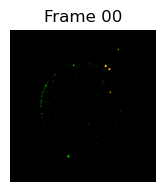

KeyboardInterrupt: 

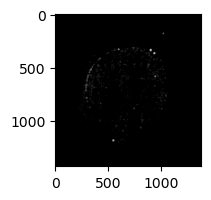

In [3]:
datafolder = '../Results/PaperResults/drying_beads_drop_2024-09-10_recon'
save_loc = './Figures/drying_beads_drop_paperfig'
os.makedirs(save_loc, exist_ok=True)  # Ensure the save directory exists

wvmin = 450
wvmax = 700
wvstep = 8
wavelengths = np.arange(wvmin,wvmax+wvstep,wvstep)

files = os.listdir(datafolder)
files.sort(key=lambda x: os.path.getctime(os.path.join(datafolder, x)))
print(files)

# Initialize list to store detected particles data
particles_in_frames = []

false_color_stack = []
xk_stack = []

# for k in range(1):
for k in range(len(files)):
    xk = np.load(os.path.join(datafolder, files[k]))
    HSI_data = np.transpose(xk, (1,2,0))
    HSI_data = np.reshape(HSI_data, [-1,xk.shape[0]])
    false_color = sdc.HSI2RGB(wavelengths, HSI_data ,xk.shape[1],xk.shape[2], 65, False)
    false_color_stack.append(false_color)
    plt.subplot(1,3,1)
    plt.imshow(false_color**1.8*2)
    plt.axis('off')
    frame = 'Frame '+str(k).zfill(2)
    plt.title(frame)
    # plt.savefig(save_loc+'/frame_'+str(k).zfill(2)+'.png')
    plt.show()
    plt.close()

    xk_chan = np.mean(xk, axis=0)
    plt.subplot(1,3,2)
    plt.imshow(xk_chan**.5, cmap='gray')
    xk_stack.append(xk_chan)
    
    f = tp.locate(xk_chan, diameter=(51,51), minmass=250, preprocess=True)
    f['frame'] = k  # Assign frame number to keep track of particles across frames
    particles_in_frames.append(f)
    plt.subplot(1,3,3)
    tp.annotate(f, xk_chan)

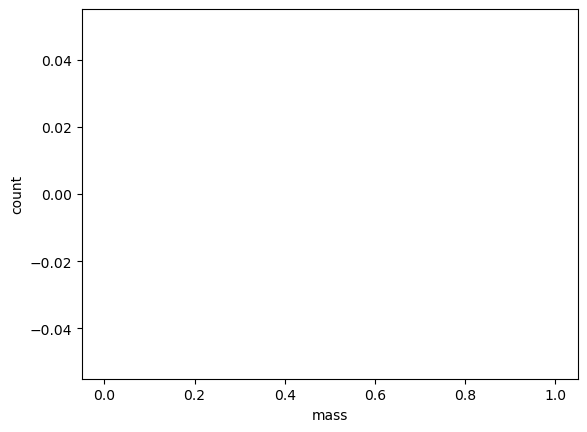

In [113]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=50)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

/home/neerja/miniconda3/envs/specscope_jax/lib/python3.10/site-packages/trackpy/plots.py:356: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  coords = unstacked.fillna(method='backfill').stack().loc[first_frame]
/home/neerja/miniconda3/envs/specscope_jax/lib/python3.10/site-packages/trackpy/plots.py:356: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  coords = unstacked.fillna(method='backfill').stack().loc[first_frame]


Frame 22: 11 trajectories present.


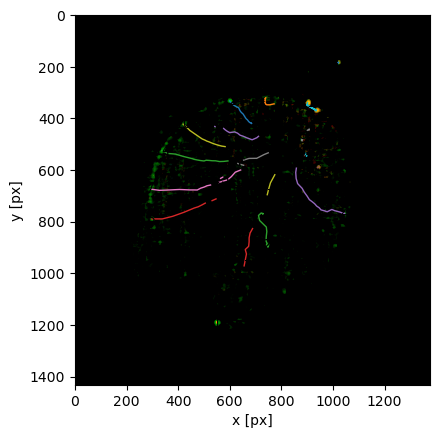

/home/neerja/miniconda3/envs/specscope_jax/lib/python3.10/site-packages/trackpy/plots.py:356: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  coords = unstacked.fillna(method='backfill').stack().loc[first_frame]
/home/neerja/miniconda3/envs/specscope_jax/lib/python3.10/site-packages/trackpy/plots.py:356: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  coords = unstacked.fillna(method='backfill').stack().loc[first_frame]


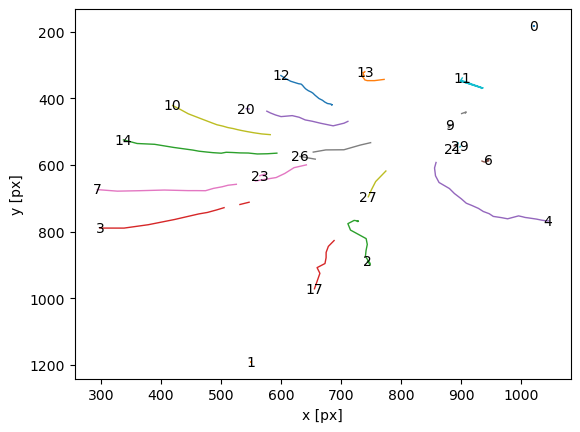

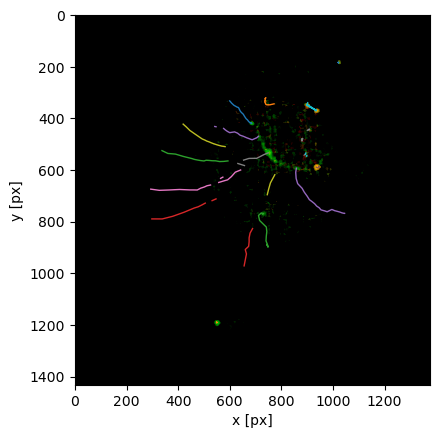

In [142]:
# 4. Link particles between frames to form trajectories
linked_particles = tp.link(pd.concat(particles_in_frames, ignore_index=True), search_range=50, memory = 6) 

# 5. Filter trajectories (optional)
filtered_particles = tp.filter_stubs(linked_particles, threshold=3)

# 6. Plot particle trajectories across all frames
plt.figure()
ax = tp.plot_traj(filtered_particles, superimpose = false_color_stack[0], label=True)
ax = tp.plot_traj(filtered_particles, label=True)
ax = tp.plot_traj(filtered_particles, superimpose = false_color_stack[-2])

In [139]:
# save dataframe
save_loc = './Figures/drying_beads_drop_paperfig'
filtered_particles.to_csv(save_loc+'/filtered_particles.csv')

IndexError: list index out of range

<Figure size 640x480 with 0 Axes>

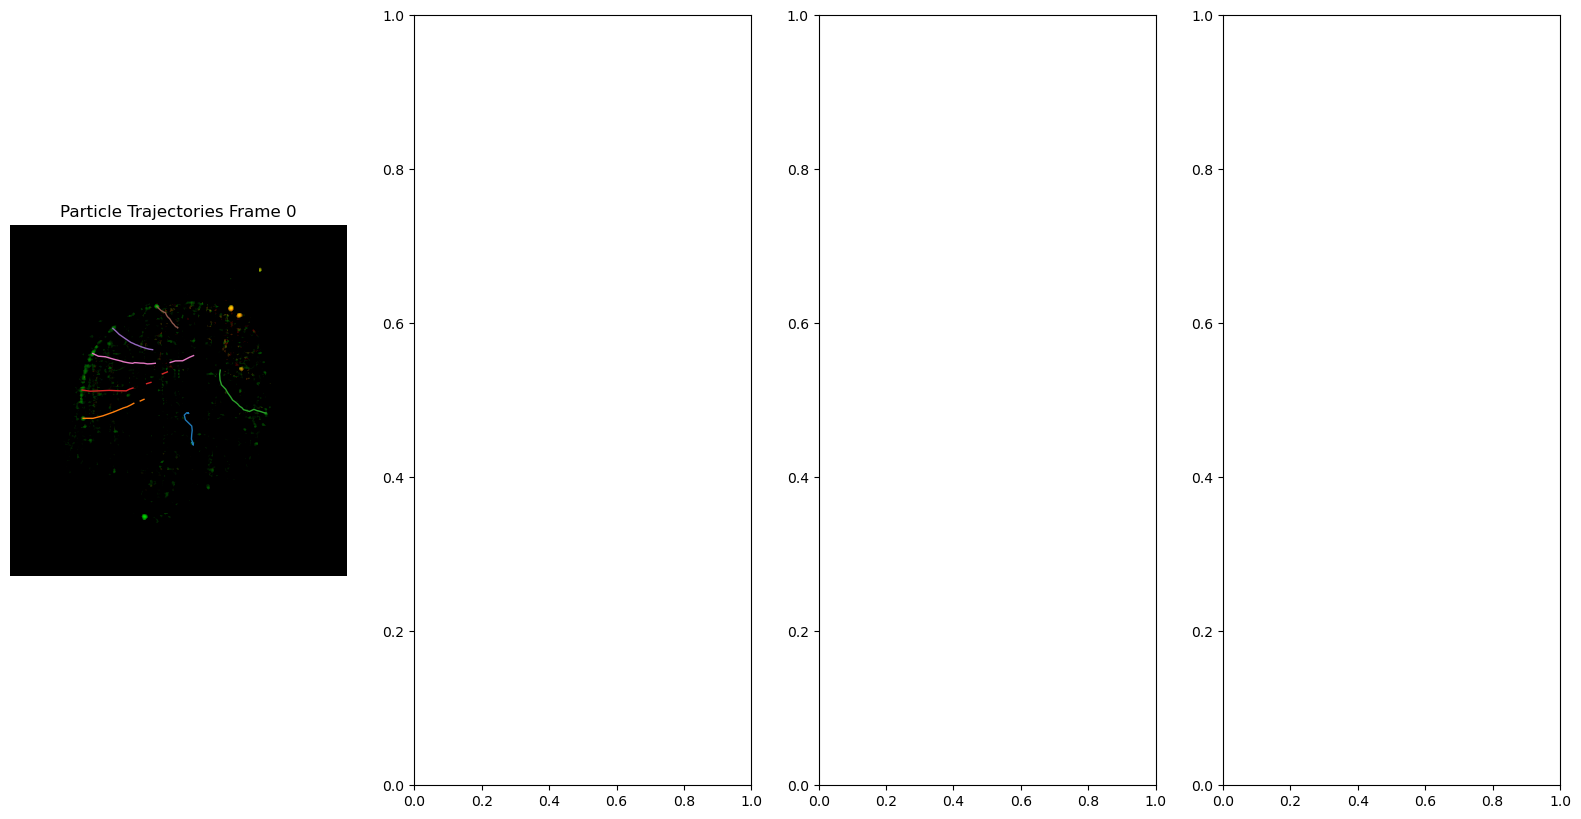

In [4]:
# specify which particles to keep
# load data frame from csv
filtered_particles = pd.read_csv(save_loc+'/filtered_particles.csv')

keep_particle = [4, 12, 2, 7, 23,26, 3, 10, 14]

filtered_particles = filtered_particles[filtered_particles['particle'].isin(keep_particle)] 

# clean up the dataframe
# Delete particle 23 in frames 14 and 15
filtered_particles = filtered_particles[~((filtered_particles['frame'].isin([14, 15])) & (filtered_particles['particle'] == 23))]
# Delete particle 26 in frame 14 and 15
filtered_particles = filtered_particles[~((filtered_particles['frame'].isin([14, 15])) & (filtered_particles['particle'] == 26))]
# combine particles 23 and 26 into particle 7 and 14      
filtered_particles['particle'] = filtered_particles['particle'].replace([23], 7)
filtered_particles['particle'] = filtered_particles['particle'].replace([26], 14)
# delete particle 7 in frame 9 - since it's duplicated
filtered_particles = filtered_particles[~((filtered_particles['frame'].isin([9, 10])) & (filtered_particles['particle'] == 7))]
# 6. Plot particle trajectories across all frames
plt.figure()

frames = [0,8,15,22]

fig, ax = plt.subplots(1,4, figsize=(20,10))
for i, f in enumerate(frames):
    ax[i] = tp.plot_traj(filtered_particles, superimpose = false_color_stack[f], ax = ax[i])
    ax[i].axis('off')
    ax[i].set_title('Particle Trajectories Frame '+str(f))


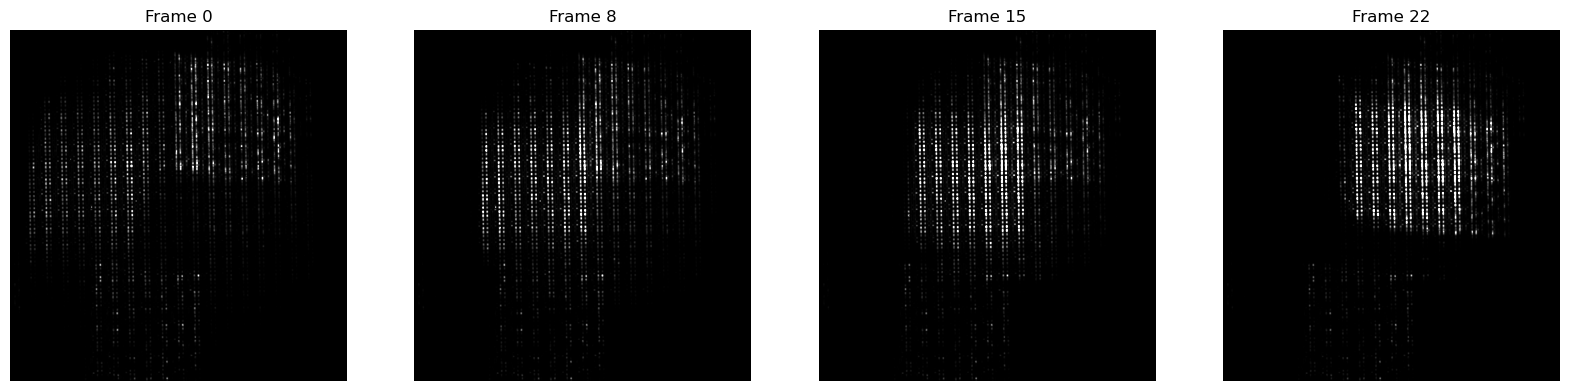

In [167]:
# Define the path to the data folder
datafolder = '/media/azuldata/neerja/2024-02-01/drying_beads_drop/'

# List all files in the data folder
meas_files = os.listdir(datafolder)

# Sort the files by creation time
meas_files.sort(key=lambda x: os.path.getctime(os.path.join(datafolder, x)))

# Specify the frames you're interested in
frames_to_select = frames

# Filter the 'meas' files that match the selected frames
# Assuming that the files are named 'meas0000', 'meas0008', etc.
selected_meas_files = [f for f in meas_files if any(f.startswith(f'meas{str(frame).zfill(4)}') for frame in frames_to_select)]

# Load the selected files
meas_folder = [os.path.join(datafolder, f) for f in selected_meas_files]
# Plot the selected frames
fig, ax = plt.subplots(1,4, figsize=(20,10))
crop_indices = [420, 1852, 1450, 2826]

power = 1.8
bits = 16
for i, f in enumerate(meas_folder):
    sample_meas = sdc.importTiff(f,'meas.tiff')/2**bits
    try:
        background = sdc.importTiff(f,'bg.tiff')/2**bits
    except:
        print('No background image found, continuing without background subtraction')
        background = torch.zeros(sample_meas.shape)
    # crop meas
    measurement = sdc.cropci((sample_meas-background),crop_indices).clip(0,1)**power

    im = ax[i].imshow(measurement, cmap='gray')
    ax[i].axis('off')
    ax[i].set_title('Frame '+str(frames_to_select[i]))
    # fig.colorbar(im, ax=ax[i])
    im.set_clim(0, 0.3)


# plot the spectra for the chosen particles

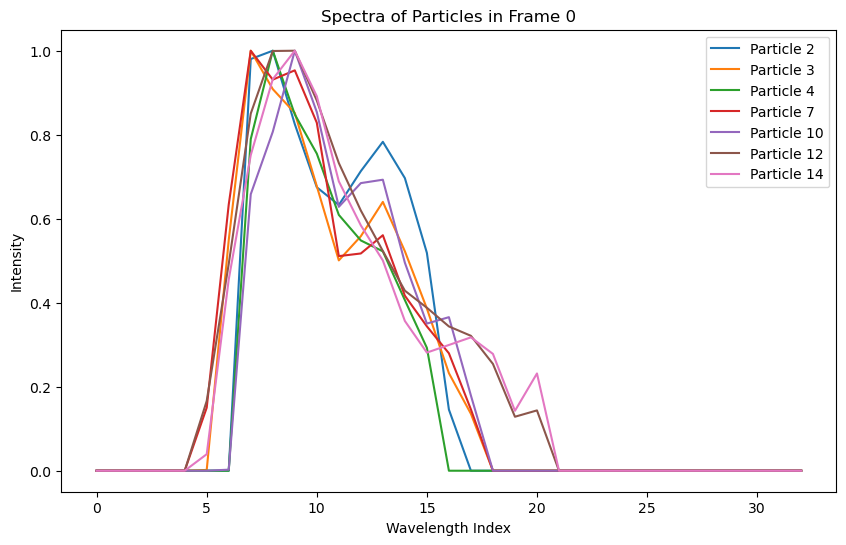

In [170]:
# plot the spectra for the particles in frame 0
# get xy positions of particles in frame 0

# Filter the DataFrame to only include data from frame 0
frame0_particles = filtered_particles[filtered_particles['frame'] == 0]

# Extract x and y positions
x_positions = frame0_particles['x'].values
y_positions = frame0_particles['y'].values
datafolder = '../Results/PaperResults/drying_beads_drop_2024-09-10_recon'
 
xk = np.load(os.path.join(datafolder, files[0]))

# Get the spectra for each particle
spectra = []
for x, y in zip(x_positions, y_positions):
    spectra.append(xk[:, int(y), int(x)])  # Collect spectra at each (x, y) position

# Plot the spectra for each particle
plt.figure(figsize=(10, 6))
for i, spec in enumerate(spectra):
    spec = spec / np.max(spec)  # Normalize the spectra
    plt.plot(spec, label=f'Particle {frame0_particles["particle"].values[i]}')

# Customize the plot
plt.title('Spectra of Particles in Frame 0')
plt.xlabel('Wavelength Index')
plt.ylabel('Intensity')
plt.legend()
plt.show()


/tmp/ipykernel_2584697/1473722443.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


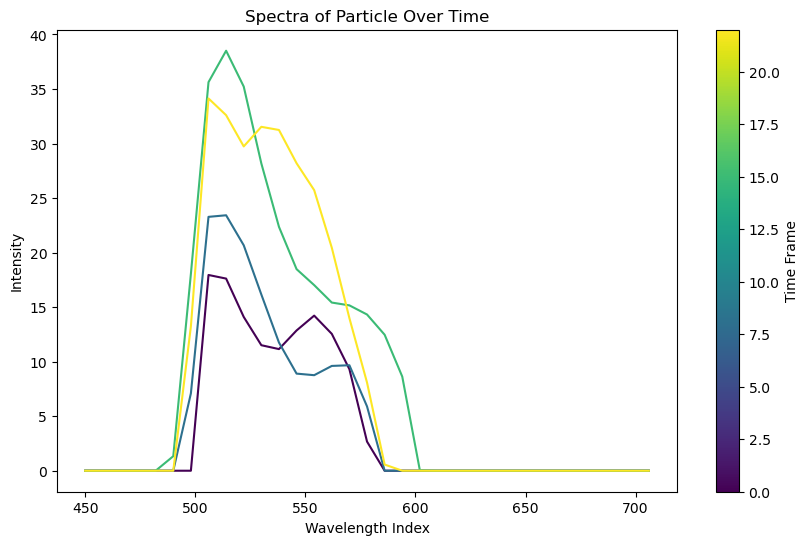

In [20]:

# Filter the DataFrame to only include data from particle 4
particle_data = filtered_particles[filtered_particles['particle'] == 2]

# Assuming the `files` variable contains all the filenames and `datafolder` is the correct path
# Initialize an empty list to store spectra over time
spectra_over_time = []

# Loop over each file (each time frame)
for file in files:
    # Load the measurement data for the current time frame
    xk = np.load(os.path.join(datafolder, file))
    
    # Get the frame number by splitting the filename correctly
    frame_number = int(file.split('_')[-1].split('.')[0])  # Extract the frame number, e.g., 0000 from 'dryingbeadsdrop_0000.npy'
    if frame_number in frames:
        # Filter particle 4's data for the corresponding frame
        particle_frame = particle_data[particle_data['frame'] == frame_number]
        
        if len(particle_frame) == 0:
            # If no data for particle 4 in this frame, skip to the next frame
            continue
        
        # Extract the x and y positions
        x_position = int(particle_frame['x'].values[0])
        y_position = int(particle_frame['y'].values[0])
        
        # Get the spectrum at the particle's position
        # spectrum = xk[:, y_position, x_position]
        # average over a 3x3 region
        pxl_avg = 1
        spectrum = np.mean(xk[:, y_position-pxl_avg:y_position+pxl_avg, x_position-pxl_avg:x_position+pxl_avg], axis=(1,2))
        # spectrum = spectrum / np.max(spectrum)  # Normalize the spectrum
        # Append the spectrum to the list if it's not small
        if np.max(spectrum) > 15:
            spectra_over_time.append(spectrum)

from matplotlib import cm  # For color maps

# Define a colormap (e.g., 'viridis' for a color gradient)
cmap = cm.get_cmap('viridis')

# Normalize the time frame indices to the range [0, 1] for color mapping
norm = plt.Normalize(vmin=frames[0], vmax=frames[-1])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the spectra for particle 4 over time (every 4th frame) with a color gradient
for i in range(0, len(spectra_over_time), 1):
    # Get a color from the colormap based on the time index
    color = cmap(norm(frames[i]))
    ax.plot(wavelengths,spectra_over_time[i], color=color, label=f'Time Frame {i}')

# Customize the plot
ax.set_title('Spectra of Particle Over Time')
ax.set_xlabel('Wavelength Index')
ax.set_ylabel('Intensity')

# Create a colorbar to indicate the time progression
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set the ScalarMappable array to an empty array, as we are only using it for color mapping
cbar = fig.colorbar(sm, ax=ax)  # Use fig.colorbar and link it to the ax

cbar.set_label('Time Frame')

plt.show()